<a id="header"></a>
# Part 5: miscellaneous topics

In [49]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

pd.options.display.max_rows = None

[Return home](../)

## Table of contents
- <a href="#buff-priority">On buff priority</a>
- <a href="#meikyo-shisui">On Meikyo Shisui</a>
- <a href="#kenki-spending">On Kenki spending</a>
- <a href="#hissatsu-mobility">On Hissatsu: Gyoten / Yaten</a>
- <a href="#third-eye">On Third Eye</a>
- <a href="#hagakure">On Hagakure</a>
- <a href="#higanbana">On Higanbana</a>

<a id="buff-priority"></a>
## On buff priority

SAM has two self buffs and one target debuff to apply. The slashing resistance down debuff may be applied by WAR and NIN within 2-3 GCDs, letting you defer Yukikaze. What order should you apply your buffs and debuffs from a fresh start? Let's examine some rotations that differ only in the buff/debuff application order.

### Shifu, Jinpu, Yukikaze

In [50]:
sam = Samurai(kenki_mastery=2)

actions = [('Hakaze'), ('Shifu'), ('Kasha'),
           ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka')]

In [51]:
df_buffs_0, average_potency, pps = sam.parse_rotation(actions)
display(df_buffs_0)

average potency per GCD = 517.7471428571428
average potency per second = 238.436184211


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,5,430.000
2,4.56,Kasha,,400.000,False,True,False,0,10,830.000
3,6.72,Higanbana,,425.200,False,True,False,0,20,1255.200
4,8.88,Hakaze,,175.200,False,True,False,1,20,1430.400
5,11.04,Jinpu,,305.200,False,True,False,1,25,1735.600
6,13.20,Gekko,,485.200,True,True,False,1,30,2220.800
7,15.36,Hakaze,,197.700,True,True,False,1,40,2418.500
8,17.52,Yukikaze,,416.200,True,True,False,1,45,2834.700
9,19.68,Hakaze,"(Hissatsu: Shinten,)",599.625,True,True,True,1,55,3434.325


### Jinpu, Shifu, Yukikaze

In [52]:
sam = Samurai(kenki_mastery=2)

actions = [('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'),           
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka')]

In [53]:
df_buffs_1, average_potency, pps = sam.parse_rotation(actions)
display(df_buffs_1)

average potency per GCD = 530.2328571428571
average potency per second = 239.151417526


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Jinpu,,280.000,False,False,False,0,5,430.000
2,4.80,Gekko,,460.000,True,False,False,0,10,890.000
3,7.20,Higanbana,,492.200,True,False,False,0,20,1382.200
4,9.60,Hakaze,,204.700,True,False,False,1,20,1586.900
5,12.00,Shifu,,354.200,True,False,False,1,25,1941.100
6,14.16,Kasha,,488.980,True,True,False,1,30,2430.080
7,16.32,Hakaze,,201.480,True,True,False,1,40,2631.560
8,18.48,Yukikaze,,419.980,True,True,False,1,45,3051.540
9,20.64,Hakaze,"(Hissatsu: Shinten,)",603.405,True,True,True,1,55,3654.945


### Yukikaze, Jinpu, Shifu

In [54]:
sam = Samurai(kenki_mastery=2)

actions = [('Hakaze'), ('Yukikaze'),
           ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Shinten'),           
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze')]

In [55]:
df_buffs_2, average_potency, pps = sam.parse_rotation(actions)
display(df_buffs_2)

average potency per GCD = 517.4309523809524
average potency per second = 230.995960884


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Yukikaze,,340.000,False,False,False,0,5,490.000
2,4.80,Higanbana,,368.000,False,False,True,0,15,858.000
3,7.20,Hakaze,,194.500,False,False,True,1,15,1052.500
4,9.60,Jinpu,,338.800,False,False,True,1,20,1391.300
5,12.00,Gekko,,538.600,True,False,True,1,25,1929.900
6,14.40,Hakaze,,219.475,True,False,True,1,35,2149.375
7,16.80,Shifu,,385.420,True,False,True,1,40,2534.795
8,18.96,Kasha,"(Hissatsu: Shinten,)",918.750,True,True,True,1,45,3453.545
9,21.12,Hakaze,"(Hissatsu: Shinten,)",599.625,True,True,True,1,30,4053.170


### Yukikaze, Shifu, Jinpu

In [56]:
sam = Samurai(kenki_mastery=2)

actions = [('Hakaze'), ('Yukikaze'),
           ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),           
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze')]

In [57]:
df_buffs_3, average_potency, pps = sam.parse_rotation(actions)
display(df_buffs_3)

average potency per GCD = 510.450238095238
average potency per second = 231.421740069


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Yukikaze,,340.000,False,False,False,0,5,490.000
2,4.80,Higanbana,,368.000,False,False,True,0,15,858.000
3,7.20,Hakaze,,194.500,False,False,True,1,15,1052.500
4,9.60,Shifu,,338.800,False,False,True,1,20,1391.300
5,11.76,Kasha,,469.200,False,True,True,1,25,1860.500
6,13.92,Hakaze,,191.700,False,True,True,1,35,2052.200
7,16.08,Jinpu,,336.000,False,True,True,1,40,2388.200
8,18.24,Gekko,"(Hissatsu: Shinten,)",918.750,True,True,True,1,45,3306.950
9,20.40,Hakaze,"(Hissatsu: Shinten,)",599.625,True,True,True,1,30,3906.575


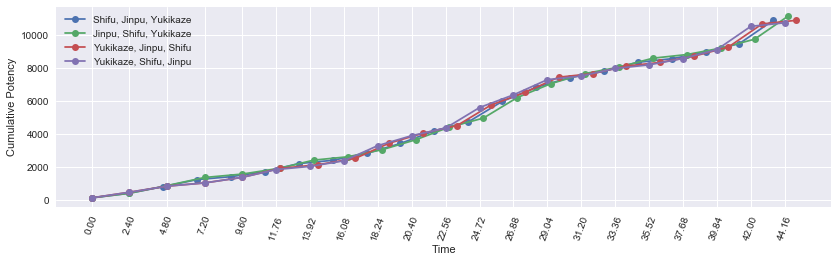

In [58]:
compare_n_potencies([df_buffs_0, df_buffs_1, df_buffs_2, df_buffs_3], ['Shifu, Jinpu, Yukikaze', 'Jinpu, Shifu, Yukikaze', 'Yukikaze, Jinpu, Shifu', 'Yukikaze, Shifu, Jinpu'])

The results are quite close but Jinpu and Shifu appear to be the highest priority. For total party DPS, contributions due to (~16s) earlier application of the slashing resistance down debuff should be accounted for, assuming no WAR or NIN in the party. How do priorities differ if someone else, e.g., WAR, can apply the debuff instead?

### External force applying slashing resistance down early

In [59]:
sam = Samurai(kenki_mastery=2)
sam.applied_yukikaze = True

actions = [('Hakaze'), ('Shifu'), ('Kasha'),
           ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka')]

df_buffs_0_sl, average_potency, pps = sam.parse_rotation(actions)

sam = Samurai(kenki_mastery=2)
sam.applied_yukikaze = True

actions = [('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'),           
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka')]

df_buffs_1_sl, average_potency, pps = sam.parse_rotation(actions)

sam = Samurai(kenki_mastery=2)
sam.applied_yukikaze = True

actions = [('Hakaze'), ('Yukikaze'),
           ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Shinten'),           
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze')]

df_buffs_2_sl, average_potency, pps = sam.parse_rotation(actions)

sam = Samurai(kenki_mastery=2)
sam.applied_yukikaze = True

actions = [('Hakaze'), ('Yukikaze'),
           ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),           
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze')]

df_buffs_3_sl, average_potency, pps = sam.parse_rotation(actions)

average potency per GCD = 529.5511904761904
average potency per second = 243.872258772
average potency per GCD = 543.0033333333333
average potency per second = 244.911297251
average potency per GCD = 517.4309523809524
average potency per second = 230.995960884
average potency per GCD = 510.450238095238
average potency per second = 231.421740069


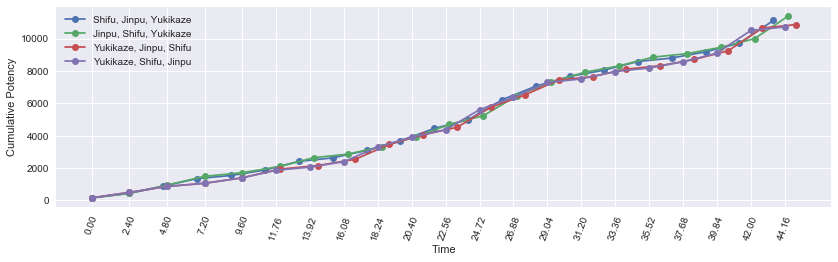

In [60]:
compare_n_potencies([df_buffs_0_sl, df_buffs_1_sl, df_buffs_2_sl, df_buffs_3_sl], ['Shifu, Jinpu, Yukikaze', 'Jinpu, Shifu, Yukikaze', 'Yukikaze, Jinpu, Shifu', 'Yukikaze, Shifu, Jinpu'])

Here I made the assumption that the slashing resistance down debuff was already applied at the beginning of each rotation. We see that the value of deferring Yukikaze increases if someone else can apply the debuff instead. Although the average potency per GCD is much higher when applying Jinpu before Shifu while the delta in pps is much smaller, the results are likely to change as your skill speed changes. Here are some points to consider:

- Jinpu increases the potency per weaponskill and ability because it is a damage dealt increased buff.
    - Increases the value of Kenki spenders while Shifu does nothing for them.
    - Increases the value of Higanbana and its DoT while Shifu directly does not.
- Shifu provides a haste-type buff. This increases auto attack and weaponskill frequency. This may allow you to fit more actions into a buff window.
    - This also increases the rate of Kenki and Sen accrual.
    - This reduced weaponskill recast time may exacerbate GCD clipping when double weaving.

Because the outcome from either priority system is so similar, external factors such as party buffs and encounter duration will be the primary driving force behind which policy you follow. The above points of consideration plus those external factors should play into how you design openers on a case-by-case basis.

<a href="#header">back to the top...</a>

<a id="meikyo-shisui"></a>
## On Meikyo Shisui
Some of the initial questions of Meikyo Shisui were if Iaijutsu would consume charges of it and if combo actions initiated during it would continue after the buff expired. Testing on the live server showed:

- Iaijutsu does not consume charges
- Combo actions do not continue after the buff expires

The first revelation increases the flexibility of Meikyo Shisui. With the buff's 10s duration, it is possible to spend your three charges while using an Iaijutsu sometime in between. The implications of that are immense:

1) High, raw damage in 3-4 GCDs
    - e.g., with Setsu already open, do Kasha, Gekko+Hissatsu: Kaiten, Midare Setsugekka, Kasha. That's 1200+1080=2280 potency in 4 GCDs plus 30 Kenki.

2) Up to 30 Kenki generated in 3-4 GCDs

3) Expedited Sen opening for rapid Iaijutsu and/or Kenki generation via Hagakure

The sheer potency and utility of Kasha, Gekko, and (to a lesser extent) Yukikaze exemplify how powerful Meikyo Shisui is. At 400 potency (340 for Yukikaze) and 10 Kenki generated for each, the opportunity to skip the lower potency and Kenki production of Hakaze, Shifu, and Jinpu is huge. From a damage and potential damage perspective, it is optimal to use Meikyo Shisui to do some combination of Kasha, Gekko, and Yukikaze with an Iaijutsu in between.

### Example 1: Two of Kasha or Gekko, one of the other

In [61]:
sam = Samurai(kenki_mastery=2)

actions = [('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Guren'),
           ('Hakaze', 'Hagakure'), ('Yukikaze', 'Meikyo Shisui'),
           ('Gekko', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Kasha', 'Hissatsu: Shinten')]

df_ms, average_potency, pps = sam.parse_rotation(actions)
display(df_ms)

average potency per GCD = 532.045652173913
average potency per second = 241.647906793


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Jinpu,,280.000,False,False,False,0,5,430.000
2,4.80,Gekko,,460.000,True,False,False,0,10,890.000
3,7.20,Hakaze,,172.500,True,False,False,0,20,1062.500
4,9.60,Shifu,,322.000,True,False,False,0,25,1384.500
5,11.76,Kasha,,460.000,True,True,False,0,30,1844.500
6,13.92,Hakaze,,172.500,True,True,False,0,40,2017.000
7,16.08,Yukikaze,"(Hissatsu: Guren,)",1412.200,True,True,False,0,45,3429.200
8,18.24,Hakaze,"(Hagakure,)",191.475,True,True,True,0,5,3620.675
9,20.40,Yukikaze,"(Meikyo Shisui,)",434.010,True,True,True,0,70,4054.685


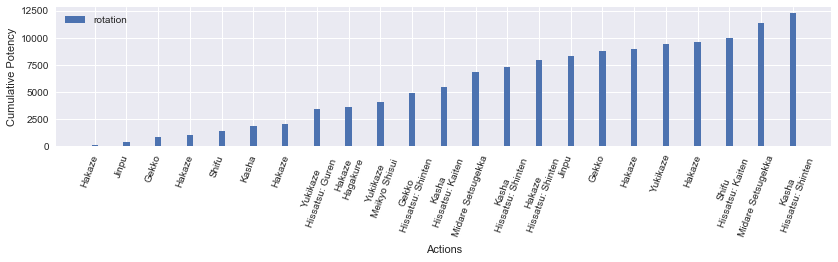

In [62]:
plot_potency(df_ms)

By using some combination of Kasha and Gekko only for our Meikyo Shisui charges, we end up with the situation where one of our Shifu or Jinpu buffs will fall off. This is due to us avoiding combos that terminate in opening a Sen that has already been opened; in this example, it was the Kasha combo leading to Shifu being dropped for about 4-5 seconds. In this instance, we moved the final Midare Setsugekka to after Hakaze -> Shifu to minimize Shifu downtime.

The penalty for dropping the Shifu or Jinpu buff is in the neighborhood of 9-15% potency per GCD. For example, dropping Jinpu for 4-5 seconds is about two GCDs plus auto attacks; Hakaze -> Jinpu is 150+280=430 potency plus maybe 2 auto attacks. This puts the raw potency lost due to a dropped buff in the order of 90-100 (auto attacks not accounted for in my modeling). This is larger than the difference between Yukikaze and Kasha or Gekko.

### Example: One Yukikaze, one Kasha, one Gekko

In [63]:
sam = Samurai(kenki_mastery=2)

actions = [('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Guren'),
           ('Hakaze', 'Hagakure'), ('Jinpu'), ('Gekko', 'Meikyo Shisui'),
           ('Yukikaze', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Gekko', 'Hissatsu: Shinten')]

df_ms2, average_potency, pps = sam.parse_rotation(actions)
display(df_ms2)

average potency per GCD = 556.6820833333333
average potency per second = 253.037310606


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Jinpu,,280.000,False,False,False,0,5,430.000
2,4.80,Gekko,,460.000,True,False,False,0,10,890.000
3,7.20,Hakaze,,172.500,True,False,False,0,20,1062.500
4,9.60,Shifu,,322.000,True,False,False,0,25,1384.500
5,11.76,Kasha,,460.000,True,True,False,0,30,1844.500
6,13.92,Hakaze,,172.500,True,True,False,0,40,2017.000
7,16.08,Yukikaze,"(Hissatsu: Guren,)",1412.200,True,True,False,0,45,3429.200
8,18.24,Hakaze,"(Hagakure,)",191.475,True,True,True,0,5,3620.675
9,20.40,Jinpu,,357.420,True,True,True,0,70,3978.095


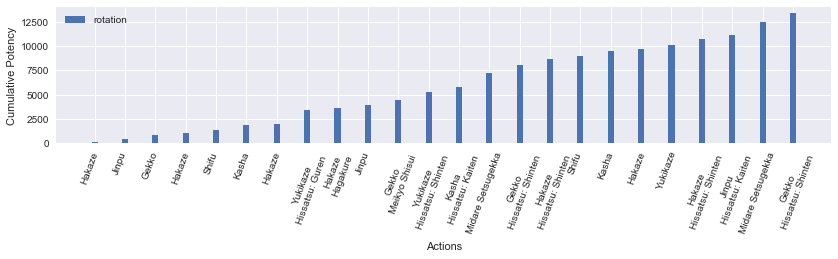

In [64]:
plot_potency(df_ms2)

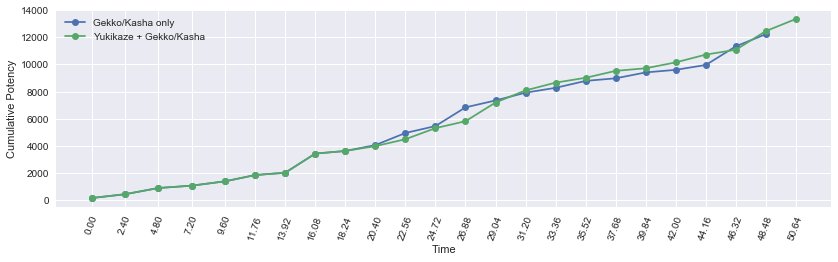

In [65]:
compare_n_potencies([df_ms, df_ms2], ['Gekko/Kasha only', 'Yukikaze + Gekko/Kasha'])

The advantage of using Yukikaze in your Meikyo Shisui window ensures you don't need to worry about dropping a buff. The final weaponskill you use on Meikyo Shisui should be the one of Kasha or Gekko corresponding to the buff with the longest remaining duration. For example, if Shifu has more duration than Jinpu, finish the window with Kasha then follow up with the Gekko combo. The auto-attack penalty from dropping a buff isn't accounted for here but regardless, the second policy comes out on top. (Generating extra Kenki for Hissatsu: Shinten doesn't hurt either.)

<a href="#header">back to the top...</a>

<a id="kenki-spending"></a>
## On Kenki spending
As I've iterated, Kenki grants access to just about all of your damage-dealing abilities which are, cumulatively, an enormous share of your potential DPS. Economical spending of Kenki is therefore essential to maximizing your DPS.

Throughout the leveling process, we gain a number of Kenki spenders. We examine their value by their potency per Kenki (ppK) in order to evaluate their usefulness.

### For single target situations:

1) Hissatsu: Guren (16 ppK)

    1) Although at a lower ppK than Hissatsu: Kaiten on Iaijutsu, its potency is from the ability and not a weaponskill. It does not directly compete with Iaijutsu; it only competes via Hagakure usage.

2) Hissatsu: Kaiten on Higanbana (full duration) (23.5 ppK)
    
2) Hissatsu: Kaiten on Midare Setsugekka (18 ppK)

3) Hissatsu: Seigan (~13 ppK)

4) Hissatsu: Shinten (12 ppK)

5) Hissatsu: Gyoten / Yaten (10 ppK)

5) Hissatsu: Kaiten on Gekko / Kasha (10 ppK)

### For multiple target situations:

1) Hissatsu: Guren (>16 ppK)

2) Hissatsu: Kaiten on Tenka Goken (>9 ppK)

3) Hissatsu: Kyuten (6*n* ppK, where *n* is the number of targets)

    1) We examined the tradeoff between 2) and 3) in Part 4. In short, always have Kenki to use on Hissatsu: Kaiten for Tenka Goken. Excess Kenki goes to Hissatsu: Kyuten. With the Fuga, Oka, Fuga, Mangetsu combo generating 30 Kenki total, this should always be possible.

### Wasted Kenki
Kenki capping is a risk especially when using Hagakure to convert three Sen. The penalty for doing so may be determined via the ppK values above. Since Kenki is quantized in units of 5, the potency losses are not insignificant. These losses are, however, only realized if they would have been spendable in the first place. For example, if you overflowed Kenki by 5 but ended the encounter with 0 Kenki, then you haven't lost anything because that 5 Kenki could not have been spent anyway. However, if you instead ended with 5 Kenki, it is a loss of 100 potency because you could have spent the 10 Kenki on Hissatsu: Gyoten / Yaten.

Along those lines, while we strive to convert all Kenki into Hissatsu: Seigan / Shinten (in single target situations), ending an encounter with Kenki left on the table is a definite loss. Although typically less than ideal, dump Kenki into Hissatsu: Gyoten if it means Kenki goes unused otherwise. Alternatively, if you have 20 Kenki to spend, use it on Hissatsu: Kaiten for Gekko or Kasha.

<a href="#header">back to the top...</a>

<a id="hissatsu-mobility"></a>
## On Hissatsu: Gyoten / Yaten
The difference in ppK between Hissatsu: Shinten and Hissatsu: Gyoten is miniscule but there. The utility of a gap closer is increasing uptime via reduction of transit time. The increase in auto attacks from using Hissatsu: Gyoten should alone make it worth it; the increased weaponskill uptime for Sen and Kenki generation seals the deal. Use Hissatsu: Gyoten whenever you need the gap closer.

Hissatsu: Yaten is a little more subtle. The Enhanced Enpi proc granted increases the potency of the next Enpi you use to 300. Using this Enhanced Enpi gives you time to move back into range and refunds the Kenki cost of using Hissatsu: Yaten. Furthermore, the increased potency offsets the loss from not being able to do your weaponskill combos. (The Gekko/Kasha combos average ~276 potency per GCD plus the Kenki generated.) You may also argue that if you use Hissatsu: Yaten to stay active longer before disengaging to dodge adds benefit from increased uptime.

If our goal is to not take damage from point blank AoE attacks, then our options are:

1) Disengage early to dodge, then:

    1) Run back into range
    
    2) Hissatsu: Gyoten back into range

2) Use Hissatsu: Yaten to dodge, then:

    1) Run back into range
    
    2) Enpi, then run back into range
    
    3) Enpi, then Hissatsu: Gyoten back into range

Disengaging early and running back into range saves Kenki at the cost of reduced uptime. If that saved Kenki is instead spent on Hissatsu: Shinten, that is a gain of 2 ppK. If we lost weaponskills due to lost uptime, e.g., we lost between 5 and 10 Kenki in addition to the weaponskill potency and auto attacks. It is difficult to imagine a scenario where we would want to take the loss in uptime.

Using Hissatsu: Yaten to dodge incurs the cost of the reduced ppK but not of reduced uptime or related weaponskill losses (since it is off the GCD). The next decision is if you use the Enhanced Enpi proc or not. As stated, the increased potency plus Kenki refund is more than sufficient to make it worth using, especially if the alternative is doing nothing. Doing nothing in lieu of Enpi may be attractive if you are mid-combo since Enpi breaks combo. Breaking combo delays Sen opening, Kenki generation, and devalues the combo actions already taken.

If you backstep mid-combo prior to Kasha or Gekko, you may preserve your combo by doing nothing and waiting to reengage. The outcome is 400 potency, an open Sen, and the 10 Kenki cost of Hissatsu: Yaten refunded. The opened Sen may be valued by its Kenki equivalent (via Hagakure) of 20 -- a value of 240 potency if converted into Hissatsu: Shinten. Alternatively, it may be valued for its progress towards Midare Setsugekka -- a value of 240 or 360 potency. Compare this to the 300 potency of Enhanced Enpi plus refunded Kenki cost with a broken combo. When faced with these two options, preserving your combo by doing nothing is the attractive option.

Breaking combo after only Hakaze appears to lean differently. It is a similar value proposition as the previous scenario if the intended combo path were Yukikaze. In this case, you should elect to preserve your combo for Yukikaze. However, if the intended combo paths end in Kasha or Gekko, breaking combo with Enhanced Enpi looks more attractive:

- The next combo step after Hakaze is 280 potency plus 5 Kenki and the opportunity to finish the combo.
- There is less of a sunk cost if the combo is broken (only Hakaze will be "wasted"). Essentially, you defer the combo by two GCDs and write off the Hakaze. 

The Enhanced Enpi covers the immediate next GCD (Jinpu or Shifu) with its increased potency and higher Kenki generated. It also covers the cost of doing nothing instead. So while you ideally should not use Hissatsu: Yaten to disengage while in the middle of a combo, you should not use Enhanced Enpi unless you're only on the Hakaze step of the combo and intend to finish the combo with Kasha or Gekko. In that case, you should break combo with Enhanced Enpi.

The final decision is if you use Hissatsu: Gyoten to get back into range. Once again, the tradeoff is reduced Kenki efficiency versus increased uptime. If the dodge maneuver is executed efficienctly, then the GCD after using Enpi will most likely be enough to return to the target without clipping the following GCD. Therefore, the tension is between auto attack uptime and Kenki savings. If auto attacks are approximately 100 potency, then using Hissatsu: Gyoten to close the gap is worth it if at least one auto attack is gained as a result. However, if the Kenki spent on Hissatsu: Gyoten prevents you from using a Hissatsu: Shinten later on, then running back into range would have been the better option. The payoff in using the gap closer is minimal compared to the potential penalty for inefficient Kenki use (~100 potency for a gained auto attack versus 200 potency loss for insufficient Kenki for Hissatsu: Shinten). I would imagine that the expected payoff is optimal if you elect to run back into range instead of using Hissatsu : Gyoten.

<a href="#header">back to the top...</a>

<a id="third-eye"></a>
## On Third Eye
This defensive ability with a short cooldown offers a modest one time damage taken reduction. Additionally, it grants the Open Eyes status, enabling the use of either Merciful Eyes or Hissatsu: Seigan. 

Merciful Eyes's healing potency was reduced since the media tour tool tip release by a factor of 3. What was once a frequently available Second Wind alternative has been reduced to a pitiful 200 potency heal. In my experience, this is enough to offset an auto attack while, for example, face-tanking a FATE boss. As such, use Open Eyes for Merciful Eyes if you are desparate.

On the other hand, the ability formerly known as Starry Eyes, Hissatsu: Seigan, which was useless due to its high Kenki cost according to the media tour tool tips, has since found its calling along with its renaming to be inline with the other Kenki spenders. At a potency of 200 with a Kenki cost of 15, its potency per Kenki ratio of ~13 ranks it third among Kenki spenders, beating out the gold standard of Hissatsu: Shinten (at a potency per Kenki ratio of 12).

This grants an avenue of optimization in which you try to make sure you activate Third Eye before as many (unavoidable) damage situations as you can. Kenki that would have gone to a Hissatsu: Shinten dump may then be used on Hissatsu: Seigan instead for a theoretical DPS gain. The modest duration of the Open Eyes status (15s) enables you to spend the Open Eyes at your convenience (e.g., you currently only have enough Kenki for an upcoming Hissatsu: Kaiten for Midare Setsugekka, which takes priority).

Of course, this theoretical DPS gain means nothing if the Kenki difference is not made up by the end of the encounter; if you end the encounter with 10 spare Kenki, then a Hissatsu: Shinten should've been used instead.

Try taking advantage of Third Eye on fights like Susano EX! There's raidwide damage with cast bars (Unkehi), targeted damage (stack after knockback, targeted lightning), raidwide damage without cast bars (during the parry active time maneuver).

<a href="#header">back to the top...</a>

<a id="hagakure"></a>
## On Hagakure
As discussed in part 4, Hagakure is a subtly vital cooldown. By converting open Sen into Kenki, it essentially is shifting damage potential from being on the GCD (via Iaijutsu weaponskills) to being off the GCD (via Kenki spenders). This effectively makes the damage potential "free" because it's no longer constrained to the GCD. This pushes your rotation up a GCD because you no longer need to cast the Iaijutsu to realize that potential. 

Besides Higanbana, Midare Setsugekka is our most powerful Iaijutsu at 720 potency for three Sen. If Hagakure is used to convert this three Sen into Kenki, 60 Kenki is generated. If this Kenki is used for Hissatsu: Shinten at 12 ppK, the equivalent 720 potency is there. Thus, with our "gold standard" of Kenki spenders, all the potency is accounted for. In fact, one does not need to exclusively convert three Sen using Hagakure because it would still be efficient to convert one or two Sen due to the exchange rate. If the generated Kenki is used on Hissatsu: Seigan or other higher efficiency Kenki spenders, the value of Hagakure increases further.

When might it be useful to use Hagakure on one or two Sen?

- Getting Hagakure on cooldown sooner

- Adjusting your Midare Setsugekka timing to align with encounter mechanics and/or party buffs

- Fast loans of Kenki for on-demand burst potential (e.g., add phase)

The value of Hagakure depends on being able to convert the Kenki back into potency. You may look at the ppK list and say, "Hissatsu: Kaiten plus Midare Setsugekka is the highest efficiency use of Kenki. Why should we ever convert three Sen into Kenki?" While it's true that Hissatsu: Kaiten + Midare Setsugekka is the best bang for your buck in terms of ppK, the ability to move the damage from Midare Setsugekka off the GCD provides the actual gains in pps, which is what actually matters.

### Example

In [66]:
sam = Samurai(kenki_mastery=2)

actions = [('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Guren'),
           ('Hakaze', 'Hagakure'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Meikyo Shisui'),
           ('Yukikaze', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hissatsu: Shinten')]

df_hgk1, average_potency, pps = sam.parse_rotation(actions)
display(df_hgk1)

average potency per GCD = 560.5756250000001
average potency per second = 252.511542793


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Jinpu,,280.000,False,False,False,0,5,430.000
2,4.80,Gekko,,460.000,True,False,False,0,10,890.000
3,7.20,Hakaze,,172.500,True,False,False,0,20,1062.500
4,9.60,Shifu,,322.000,True,False,False,0,25,1384.500
5,11.76,Kasha,,460.000,True,True,False,0,30,1844.500
6,13.92,Hakaze,,172.500,True,True,False,0,40,2017.000
7,16.08,Yukikaze,"(Hissatsu: Guren,)",1412.200,True,True,False,0,45,3429.200
8,18.24,Hakaze,"(Hagakure,)",191.475,True,True,True,0,5,3620.675
9,20.40,Jinpu,"(Hissatsu: Shinten,)",740.370,True,True,True,0,70,4361.045


In [67]:
sam = Samurai(kenki_mastery=2)

actions = [('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Meikyo Shisui'),
           ('Yukikaze', 'Hissatsu: Guren'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'), ('Gekko')]

df_hgk2, average_potency, pps = sam.parse_rotation(actions)
display(df_hgk2)

average potency per GCD = 543.8215625
average potency per second = 244.964667793


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Jinpu,,280.000,False,False,False,0,5,430.000
2,4.80,Gekko,,460.000,True,False,False,0,10,890.000
3,7.20,Hakaze,,172.500,True,False,False,0,20,1062.500
4,9.60,Shifu,,322.000,True,False,False,0,25,1384.500
5,11.76,Kasha,,460.000,True,True,False,0,30,1844.500
6,13.92,Hakaze,,172.500,True,True,False,0,40,2017.000
7,16.08,Yukikaze,"(Hissatsu: Kaiten,)",391.000,True,True,False,0,45,2408.000
8,18.24,Midare Setsugekka,,1378.620,True,True,True,0,35,3786.620
9,20.40,Hakaze,,191.475,True,True,True,0,35,3978.095


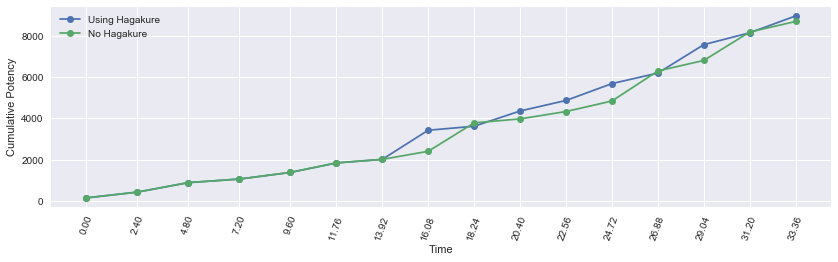

In [68]:
compare_n_potencies([df_hgk1, df_hgk2], ['Using Hagakure', 'No Hagakure'])

The two policies diverge in a number of spots:

- Deferring the first Midare Setsugekka lets us spend Kenki on Hissatsu: Guren earlier. This basically already covers the difference of using Hagakure instead of Midare Setsugekka.

- Using Hagakure gave us four Hissatsu: Shinten compared to not using it at the expense of one Midare Setsugekka. This is essentially where the cumulative potency was derived from. In addition to the Kenki converted using Hagakure, we were able to generate more Kenki from weaponskills alone.

- At the end of these simulations, the one with the policy of using Hagakure ends with more Kenki (=> potential damage) and marginally higher pps.

To sum up:

- Hagakure converts damage potential from being on the GCD with Iaijutsu to being off the GCD with Kenki spenders.
    - More specifically, it essentially turns Midare Setsugekka into Kenki.

- The value in the conversion is only realized if the Kenki is actually spent. While the conversion gives you flexibility in when/how you spend it (i.e., you can bank the Kenki at your convenience), the payoff period takes a little longer. For example, you would need to use Hissatsu: Shinten 3-4 times over 3-4 GCDs. This has the potential to lead to wasted Kenki if you're not careful.

- Hagakure does not need to always be spent on three Sen for benefit.

- You can use Hagakure to adjust your rotation timings by clearing open Sen.

### Using Hagakure at fewer than 3 Sen
This is a mildly controversial topic. Here are the facts:

- Hagakure has a short 40s recast time.
- Therefore, waiting to open 3 Sen to use Hagakure while it is available may lead to fewer uses of Hagakure during the encounter.

    - Fewer uses => less potential damage.

- Hagakure is always a DPS gain if the Kenki generated with it is consumed.
- Hagakure has a linear relationship between utility and the number of Sen converted due to the 20:1 Kenki:Sen conversion rate.
- Because Hagakure has a recast time and has a finite number of uses, we need to consider that we cannot always convert Sen on demand with it.
- There are other subtle, less tangible aspects affected by these decisions.

    - Higanbana DoT clipping vs. dropping due to Sen alignment
    - Encounter specifics such as forced downtime and encounter duration

Therefore, the driving factor is not the number of uses of Hagakure in an encounter, but how many Sen are converted with it. This is unlike more straightforward damage cooldowns like Internal Release where you can pretty much use them on cooldown without stringent regard for timing.

For example, if we squeeze out an extra Hagakure use because we used Hagakure at one Sen twice compared to holding it to convert three Sen, we actually converted one fewer Sen even though we used Hagakure one more time. (i.e., if we held Hagakure to convert at three Sen instead, we would have converted 3+3=6 Sen total. On the other hand, we converted 1+1+3=5 Sen total, even with the extra Hagakure usage.)

It takes 2-3 GCDs, or roughly 4-7 seconds to open a Sen. Worst case scenario: Hagakure comes off cooldown when you already have three Sen open and just complete your next combo. This means you need 8 GCDs to open all three Sen if you intend on holding Hagakure to convert them; this is about 17-18 seconds. If this happens twice in an encounter, that holding time is about equal to an extra Hagakure.

With a perfect mapping of cooldowns throughout an encounter, you can probably decide the best ways to use Hagakure. Without prior knowledge of how an encounter will play out, you can safely follow some rules of thumb:

- Use Hagakure at one or two Sen if you would not otherwise be able to reach three Sen and use Midare Setsugekka.
    - e.g., the end of an encounter. Having three Sen open only pays off if you use Midare Setsugekka or if you convert it with Hagakure and spend all the resulting Kenki. This lets you get a return on your investment rather than forfeiting it, so to speak.

- Use Hagakure at one or two Sen before forced downtime, especially if the Getsu (from Gekko) and/or Ka (from Kasha) Sen are open.

    - If you will need to reapply Shifu and/or Jinpu when the encounter resumes, you will waste the Sen anyway.
    - If the downtime is one where you can use Meditate for a while, be wary of capping Kenki.
    - As an example, if you have Sen going into the sword phase of Susano EX, it's a good idea to convert them during the transition. Since this transition is also a good time to get a full Meditate, be sure to dump Kenki beforehand.

- For near 100% uptime encounters, it's a safe bet to hold Hagakure for three Sen each time unless you really need the Kenki on demand. One may argue that you may miss out on Hagakure usages if you hold it off cooldown for too much time, the potential payoff does not match the risk in my mind. 

    - Keeping Hagakure aggressively on cooldown is banking on extra Hagakure uses leading to more total Sen converted. If you keep using Hagakure at one Sen while following this policy, your chances of breaking even in Sen conversion becomes more and more unlikely. Two "premature" conversions at one Sen will require at least two extra rewarded Hagakure uses to make up the difference.

- For the "worst case scenario" where Hagakure comes off cooldown immediately after you spent three Sen, using Hagakure at two Sen may be the best compromise.

    - You shave three GCDs off of holding time compared to waiting for three Sen.
    - You only need to gain a Hagakure use and convert at one Sen to break even.

<a href="#header">back to the top...</a>

<a id="higanbana"></a>
## On Higanbana
At over effectively 1410 potency in a single GCD, Higanbana's efficiency is unmatched. However, since its payoff occurs over a 60s DoT, if most of the DoT does not tick, then we would have been better off not applying Higanbana. How much is enough?

### Apply Higanbana
We'll initialize with 20 Kenki in the gauge and Jinpu and Shifu already active but no Sen currently open. We'll assume, without loss of generality, that Hagakure, Meikyo Shisui, and Hissatsu: Guren are available.

In [69]:
sam = Samurai(base_gcd=2.40, kenki_mastery=2, kenki_gauge=20)

sam.has_jinpu = True
sam.has_shifu = True

actions = [('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Higanbana'), 
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Guren'),
           ('Hakaze'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Meikyo Shisui'),
           ('Yukikaze', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Shifu', 'Hagakure'), ('Kasha', 'Hissatsu: Kaiten'), ('Higanbana')]

df_higanbana_true, _, _ = sam.parse_rotation(actions)
display(df_higanbana_true)

average potency per GCD = 536.2691666666665
average potency per second = 248.272762346


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,True,True,False,0,20,150.000
1,2.16,Yukikaze,"(Hissatsu: Kaiten,)",340.000,False,False,False,0,25,490.000
2,4.32,Higanbana,,377.800,False,False,True,0,15,867.800
3,6.48,Hakaze,,204.300,False,False,True,1,15,1072.100
4,8.64,Jinpu,,348.600,False,False,True,1,20,1420.700
5,10.80,Gekko,,548.400,True,False,True,1,25,1969.100
6,12.96,Hakaze,,229.275,True,False,True,1,35,2198.375
7,15.12,Shifu,,395.220,True,False,True,1,40,2593.595
8,17.28,Kasha,"(Hissatsu: Guren,)",1569.600,True,True,True,1,45,4163.195
9,19.44,Hakaze,,229.275,True,True,True,1,5,4392.470


## Ignore Higanbana
We'll start with the same initial conditions but this time decide against applying Higanbana.

In [70]:
sam = Samurai(base_gcd=2.40, kenki_mastery=2, kenki_gauge=20)

sam.has_jinpu = True
sam.has_shifu = True

actions = [('Hakaze'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Meikyo Shisui'),
           ('Yukikaze', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze')]

df_higanbana_false, _, _ = sam.parse_rotation(actions)
display(df_higanbana_false)

average potency per GCD = 536.0723333333334
average potency per second = 248.181635802


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,True,True,False,0,20,150.000
1,2.16,Yukikaze,"(Hissatsu: Shinten,)",673.000,False,False,False,0,25,823.000
2,4.32,Hakaze,,166.500,False,False,True,0,10,989.500
3,6.48,Jinpu,,310.800,False,False,True,0,15,1300.300
4,8.64,Gekko,"(Hissatsu: Shinten,)",893.550,True,False,True,0,20,2193.850
5,10.80,Hakaze,,191.475,True,False,True,0,5,2385.325
6,12.96,Shifu,,357.420,True,False,True,0,10,2742.745
7,15.12,Kasha,"(Hagakure,)",510.600,True,True,True,0,15,3253.345
8,17.28,Hakaze,"(Hissatsu: Guren,)",1212.675,True,True,True,0,85,4466.020
9,19.44,Jinpu,"(Hissatsu: Shinten,)",740.370,True,True,True,0,40,5206.390


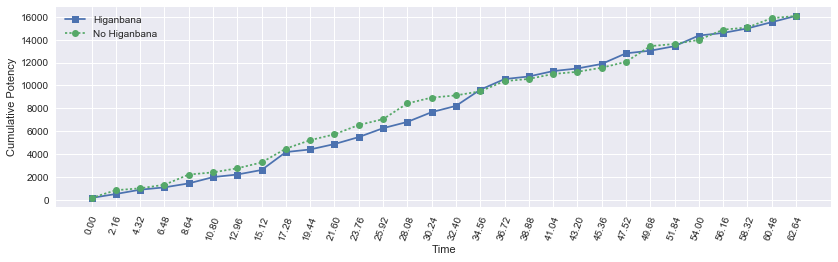

In [70]:
compare_potencies([df_higanbana_true, df_higanbana_false], ['Higanbana', 'No Higanbana'])

I applied the same policy to each scenario and limited the horizon to the duration of one Higanbana. I did not make a conscious effort to expend all resources (i.e., Sen and Kenki) at the end of this horizon so this is assuming that the encounter continues on. One small adjustment that could be made in each case is using Meikyo Shisui earlier, or even double weaving it with Hagakure if you are comfortable.

Here we see that the cumulative potency and resulting pps metrics end up being more or less equal. However, the final conditions differ in each case:

#### Applying Higanbana:
- 75 Kenki
- 0 Sen open
- Higanbana freshly applied

#### Ignoring Higanbana:
- 15 Kenki
- Setsu, Ka open

We see the immediate gains of ignoring Higanbana as that simulation takes an early lead for the first portion of the simulated duration. However, we observe the track with applied Higanbana catch up at around 34 seconds, or 30 seconds after the first Higanbana was applied. This is the point where we apply our first Midare Setsugekka to match the other policy. 

Furthermore, the ending conditions of the policy with Higanbana put it favorably ahead in terms of potential damage. It ends with effectively 115 Kenki (if we did not do the second application of Higanbana) compared to the effective 55 Kenki of the other policy. (Converting Sen to Kenki here.)

### Conclusions
I will go with the general recommendation of applying Higanbana if at least half of its DoT's duration will tick and if it does not preclude you from getting a Midare Setsugekka off in that timespan. The scale tilts in favor of applying Higanbana if there is any forced downtime (but the target is still targetable) due to mechanics; the DoT pays off even if you're not hitting a target.

One interesting observation is that even at the full duration of Higanbana, both policies are essentially equivalent in their cumulative potency outcome. If we know that we have about about a minute left in the encounter, we'll have to adjust our decisions accordingly to avoid leaving resources on the table. For example, instead of using Hagakure and reapplying Higanbana, we probably should've just used Midare Setsugekka. Here's how that would like:

In [72]:
sam = Samurai(base_gcd=2.40, kenki_mastery=2, kenki_gauge=20)

sam.has_jinpu = True
sam.has_shifu = True

actions = [('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Higanbana'), 
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Guren'),
           ('Hakaze'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Meikyo Shisui'),
           ('Yukikaze', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Shifu', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Kasha', 'Hissatsu: Gyoten')]

df_higanbana_true2, _, _ = sam.parse_rotation(actions)
#display(df_higanbana_true2)

average potency per GCD = 565.2031666666666
average potency per second = 261.668132716


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,True,True,False,0,20,150.000
1,2.16,Yukikaze,"(Hissatsu: Kaiten,)",340.000,False,False,False,0,25,490.000
2,4.32,Higanbana,,377.800,False,False,True,0,15,867.800
3,6.48,Hakaze,,204.300,False,False,True,1,15,1072.100
4,8.64,Jinpu,,348.600,False,False,True,1,20,1420.700
5,10.80,Gekko,,548.400,True,False,True,1,25,1969.100
6,12.96,Hakaze,,229.275,True,False,True,1,35,2198.375
7,15.12,Shifu,,395.220,True,False,True,1,40,2593.595
8,17.28,Kasha,"(Hissatsu: Guren,)",1569.600,True,True,True,1,45,4163.195
9,19.44,Hakaze,,229.275,True,True,True,1,5,4392.470


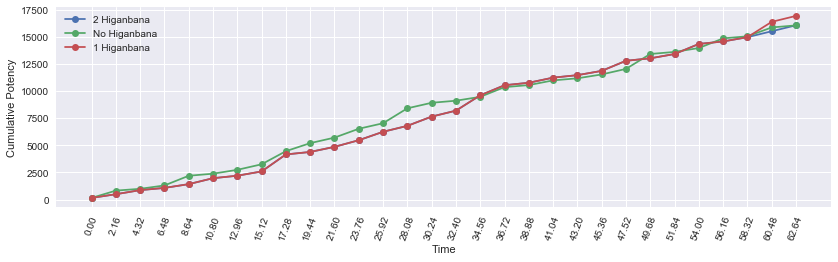

In [73]:
compare_n_potencies([df_higanbana_true, df_higanbana_false, df_higanbana_true2], ['2 Higanbana', 'No Higanbana', '1 Higanbana'])

That's a nontrivial increase in damage. This is just one of many examples of being cognizant of encounter duration when planning your resource usage.

<a href="#header">back to the top...</a>